# 2: Data Exploration
Author: Daniel Lusk

In [3]:
import os
os.environ['USE_PYGEOS'] = '0'
import json

import pandas as pd
from utils.datasets import CollectionName, Dataset, GBIFBand
from utils.visualize import plot_distributions

%load_ext autoreload
%autoreload 2

RES = 0.2

2023-12-17 17:24:20.422513: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-17 17:24:21.310954: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## sPlotOpen and GBIF raw occurrence data

In [4]:
gbif = pd.read_csv("data/gbif-splot_raw/gbif_clean_tax-spat.csv")
splot = pd.read_csv("data/gbif-splot_raw/sPlotOpen_TRYgapfilled.csv")
splot_cwm = pd.read_csv("data/gbif-splot_raw/sPlotOpen_TRYgapfilled_cwm.csv")

# Standardize column names
gbif = gbif.rename(columns={"decimalLatitude": "lat", "decimalLongitude": "lon"})
splot = splot.rename(columns={"Latitude": "lat", "Longitude": "lon"})
splot_cwm = splot_cwm.rename(columns={"Latitude": "lat", "Longitude": "lon"})

Plot global observation densities

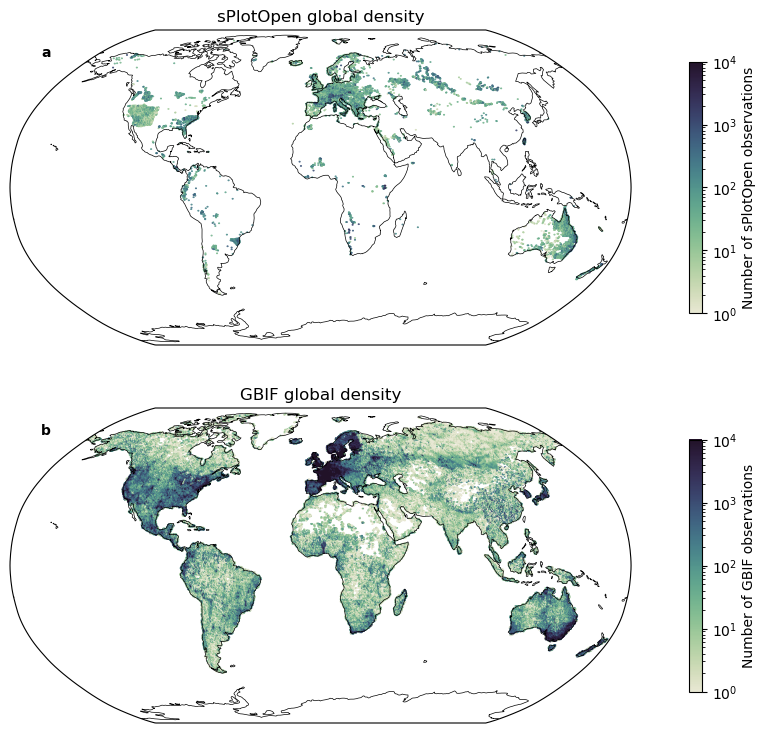

In [8]:
from utils.visualize import plot_hex_density


plot_hex_density([splot, gbif], ncols=1, log=True, names=["sPlotOpen", "GBIF"], label_subplots=True);

## TRY + GBIF/iNaturalist trait maps

### Visualize TRY + GBIF/iNaturalist trait maps

First, let's look at the trait maps generated from TRY/iNaturalist observations by [Wolf, et al. (2022)](https://doi.org/10.1038/s41559-022-01904-x).

In [ ]:
gbif = Dataset(
    res=RES,
    collection_name=CollectionName.GBIF,
    band=GBIFBand.MEAN
)

splot = Dataset(
    res=RES,
    collection_name=CollectionName.SPLOT,
    band=GBIFBand.MEAN
)

gbif_ln = Dataset(
    res=RES,
    collection_name=CollectionName.GBIF_LN,
)

splot_ln = Dataset(
    res=RES,
    collection_name=CollectionName.SPLOT_LN,
)

In [ ]:
# Map trait IDs to trait names

# Rename response variable values according to the trait id -> trait name mapping
with open("./trait_id_to_trait_name.json", "r") as f:
    mapping = json.load(f)

# Replace each column in gbif.df and splot.df according to the pattern "TRYgapfilled_X{trait_id}_" with {trait_name}
for trait_id, trait_name in mapping.items():
    gbif.df = gbif.df.rename(columns={f"GBIF_TRYgapfilled_X{trait_id}_05deg_mean": f"GBIF_{trait_name}_05deg_mean"})
    splot.df = splot.df.rename(columns={f"sPlot_TRYgapfilled_X{trait_id}_05deg_mean": f"sPlot_{trait_name}_05deg_mean"})
    gbif_ln.df = gbif_ln.df.rename(columns={f"GBIF_TRYgapfilled_X{trait_id}_05deg_mean_ln": f"GBIF_{trait_name}_05deg_mean_ln"})
    splot_ln.df = splot_ln.df.rename(columns={f"sPlot_TRYgapfilled_X{trait_id}_05deg_mean_ln": f"sPlot_{trait_name}_05deg_mean_ln"})


### GBIF trait distributions

In [ ]:
plot_distributions(gbif.df.drop(columns=["geometry"]), pdf=True)


In [ ]:
plot_distributions(gbif_ln.df.drop(columns=["geometry"]), pdf=True)

### sPlotOpen trait distributions

In [ ]:
plot_distributions(splot.df.drop(columns=["geometry"]), pdf=True)

In [ ]:
plot_distributions(splot_ln.df.drop(columns=["geometry"]), pdf=True)

## Predictor data

### MODIS surface reflectances

In [ ]:
modis = Dataset(
    res=RES,
    collection_name=CollectionName.MODIS,
)

Inspect each feature for anomalies

In [ ]:
modis.plot_rasters()

Inspect feature distributions

In [ ]:
modis.plot_distributions(pdf=True)

### WorldClim bio variables

In [ ]:
wc = Dataset(
    res=RES,
    collection_name=CollectionName.WORLDCLIM
)

Inspect features for anomalies

In [ ]:
wc.plot_rasters()

Inspect feature distributions

In [ ]:
wc.plot_distributions(pdf=True)

### ISRIC SoilGrids

In [ ]:
soil = Dataset(
    res=RES,
    collection_name=CollectionName.SOIL
)

In [ ]:
soil.plot_rasters()

In [ ]:
soil.plot_distributions(pdf=True)

### VODCA

In [ ]:
vodca = Dataset(
    res=RES,
    collection_name=CollectionName.VODCA,
)

In [ ]:
vodca.plot_rasters()

In [ ]:
vodca.plot_distributions(pdf=True)